# Distribution Functions and Probability Functions

## Probability

"Probability is a mathematical language for quantifying uncertainty." - Wasserman. L, All of Statistics

## Random Variable

A variable whose value is determined by a random process.

## Distribution Function

Given a random variable X, the cumulative distribution function (cdf) is defined as a function that for each value x returns the probability that the realization of the random variable X is smaller than or equal to the value x.

$F(x) = P(X \leq x)$

## Probability Mass/Density Function

### For discrete X:

    Given a random variable X, the probability mass function (pmf) is defined as a function that for each value x returns the probability that the realization of the random variable X is equal to the value x.

$f(x) = P(X=x)$

### For continuous X:

    Given a random variable X, the probability densitiy function (pdf) is defined as a function for which the area under the curve for each interval [a, b] returns the probability that the realization of the random variable X is within the intervall [a, b].

$f([a, b]) = P(a \leq X \leq b)$

## Why do we care?

Knowledge of distribution functions allows us to do the following:

- Model Processes
- Make probabilistic statements

In [21]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,6)

In [80]:
x_min = -3.0
x_max = 3.0

x = np.linspace(x_min, x_max, 100)

## Normal Distribution

The pdf of the normal distribution is:

$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$

It is characterized by:

- The mean $\mu$
- The standard deviation $\sigma$

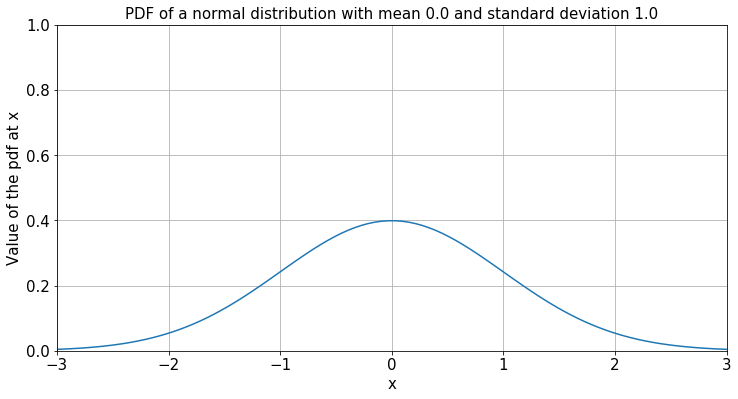

In [149]:
# Create x-values
x = np.linspace(-3, 3, 100)

# Decide on a mean and standard deviation
mean = 0.0
std = 1.0

# Create y-values using scipy.stats
y = stats.norm.pdf(x, mean, std)

# Plot the pdf
plt.plot(x, y)
plt.title(f'PDF of a normal distribution with mean {mean} and standard deviation {std}', \
          fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('Value of the pdf at x', fontsize=15)

plt.grid()

plt.xlim(x_min, x_max)
plt.ylim(0, 1)

plt.show()

Used for:

- Occurs frequently in nature

## Bernoulli Distribution

The pmf of the Bernoulli Distribution is:

$f(x\mid p)={\begin{cases}p^{x}(1-p)^{1-x}&{\text{falls}}\quad x=0,1\\0&{\text{sonst.}}\end{cases}}$

Defined by:

- The probability of observing a positive outcome: p

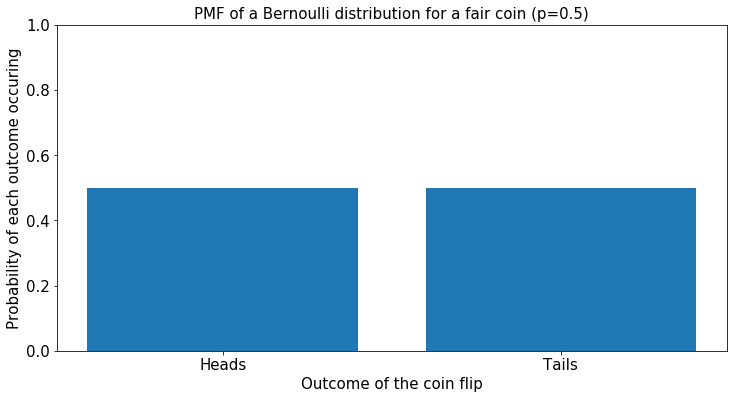

In [151]:
k = [0, 1]
labels = ['Heads', 'Tails']
p = 0.5

y = stats.bernoulli.pmf(k, p)

# Plot the pdf
plt.bar(labels, y)
plt.title(f'PMF of a Bernoulli distribution for a fair coin (p={p})', \
          fontsize=15)
plt.xlabel('Outcome of the coin flip', fontsize=15)
plt.ylabel('Probability of each outcome occuring', fontsize=15)

plt.ylim(0, 1)

plt.savefig('bernoulli.png')
plt.show()

Used for:

- One time draw of a random variable with a bivariate sample space (eg. coin toss)

Mean: $p$

Variance: $p*(1-p)$

## Binomial Distribution

The pmf of the Binomial Distribution is:

$f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k}$

It is defined by:

- The probability of observing a positive outcome: p
- The number of draws: n

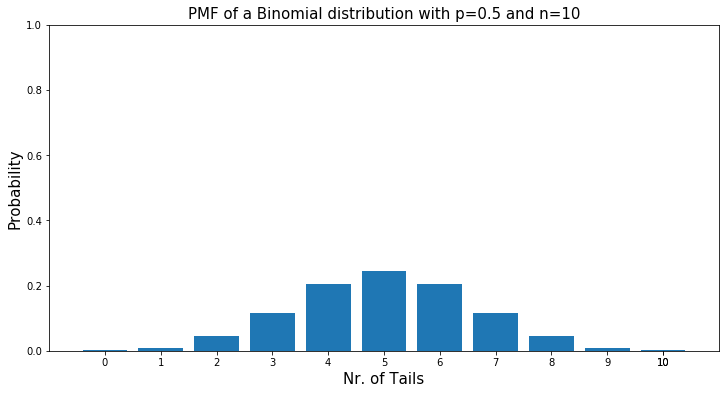

In [137]:
p = 0.5
n = 10
k = list(range(n+1))

y = stats.binom.pmf(k, p=p, n=n)

plt.bar(k, y)
plt.title(f'PMF of a Binomial distribution with p={p} and n={n}', fontsize=15)
plt.xlabel('Nr. of Tails', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.xticks(k + [10])
plt.xlim(-1, 11)
plt.ylim(0, 1)
plt.savefig('binomial.png')
plt.show()

Used for:

- Predicting the chances of occurence of bernoulli distributed random variables in multiple draws

Mean: $n*p$

Variance: $n*p*q$

## Uniform Distribution

The pmf of the Discrete Uniform Distribution is:

$f(x)=\frac {1}{n}$

It is defined by:

- The minimum value of x: a
- The maximum value of x: b

In [146]:
mpl.rcParams['font.size'] = 15

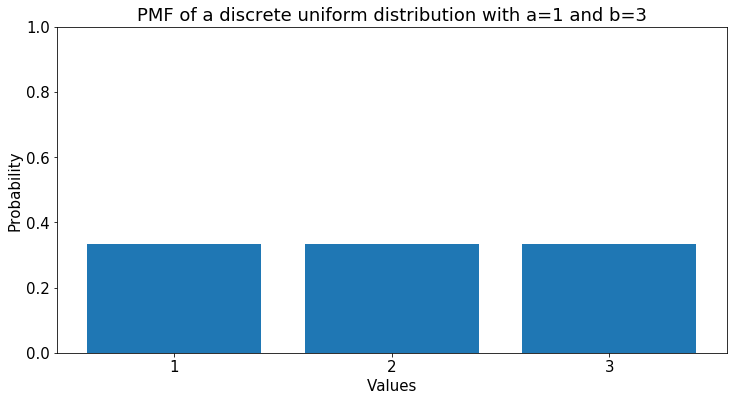

In [150]:
a = 1
b = 3
steps = 3
k = list(np.linspace(a, b, steps))

y = stats.randint.pmf(k, a, b+1)

plt.bar(k, y)
plt.title(f'PMF of a discrete uniform distribution with a={a} and b={b}')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.xticks(k)
plt.ylim(0, 1)
plt.savefig('discrete_uniform.png')
plt.show()

Used for:

- Simulation of situations in which each outcome is equally likely

Expected Value and Variance:

- $E(X) = \frac  {a+b}{2}$
- $Var(X) = \frac  {(b-a+1)^{2}-1}{12}$

## Geometric Distribution

The pmf of the Geometric Distribution is:

$f(x)=(1-p)^{k-1}p$

It is defined by:

- The probability of success: p



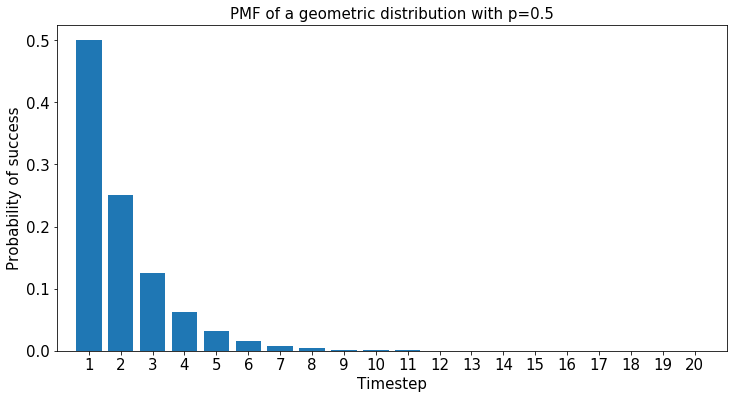

In [152]:
k = list(range(20))
p = 0.5

y = stats.geom.pmf(k, p)

plt.bar(k, y)
plt.title(f'PMF of a geometric distribution with p={p}', fontsize=15)
plt.xlabel('Timestep', fontsize=15)
plt.ylabel('Probability of success', fontsize=15)
plt.xticks(np.array(k) + 1)
plt.xlim(0, 21)
plt.savefig('geometric.png')
plt.show()

Mean: $\frac {1}{p}$

Variance: $\frac {1-p}{p^{2}}$

Used for:

- Modelling the time until success (e.g. checkout counter)